In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy
from scipy import ndimage
from skimage import util 

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

**Rounding the grey values of the images to 1 and 0 to obtain black and white images**

In [0]:
# First I tried below method for converting gray scale images to binary but as it is very slow, I am replacing it below by using cv2 library which is fast

def binarize_array(numpy_array, threshold=127):
    """Binarize a numpy array."""
    for i in range(len(numpy_array)):
        for j in range(len(numpy_array[0])):
            if numpy_array[i][j] > threshold:
                numpy_array[i][j] = 255
            else:
                numpy_array[i][j] = 0
    return numpy_array

# for i in range(len(train_images_original)):
#     train_images_original[i] = binarize_array(train_images_original[i])

# for i in range(len(test_images_original)):
#     test_images_original[i] = binarize_array(test_images_original[i])
  
#plt.grid(None)
#plt.imshow(binarize_array(train_images_original[0]))
#binarize_array(train_images_original[0]).shape


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255
  255   0 255 255 255   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255 255 255 255 255 255 255
  255 255 255 255 255   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 25

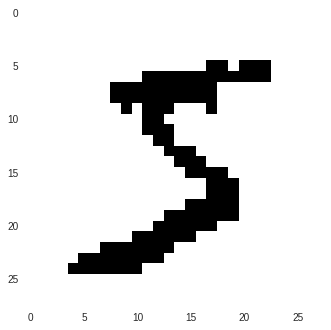

In [20]:
# Conversion Using cv2

threshold = 127
for i in range(len(train_images_original)):
    train_images_original[i] = cv2.threshold(train_images_original[i], threshold, 255, cv2.THRESH_BINARY)[1]
    

for i in range(len(test_images_original)):
    test_images_original[i] = cv2.threshold(test_images_original[i], threshold, 255, cv2.THRESH_BINARY)[1]

  

print(train_images_original[0])

# checking the binary image for any index
plt.grid(None)
plt.imshow(train_images_original[0])




In [21]:

train_images_original = train_images_original / 255;
test_images_original  = test_images_original  / 255; 

print(train_images_original[0])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0

In [22]:
# creating vectors to hold connected component data - shape ( number of samples, 1)

connected_components_train = np.zeros_like(train_labels_original)
connected_components_test  = np.zeros_like(test_labels_original)
print(train_labels_original,)
print(connected_components_train,)

[5 0 4 ... 5 6 8]
[0 0 0 ... 0 0 0]


In [23]:
for i in range(len(train_images_original)):
  train_images_original[i]=util.invert(train_images_original[i])
print(train_images_original[0])

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1

In [6]:
# using scipy ndimage to get connected components easily

for i in range(len(connected_components_train)):
  labeled, nr_objects = ndimage.label(util.invert(train_images_original[i]))
  #print(util.invert(train_images_original[i]))  
  #print(labeled)
  connected_components_train[i] = nr_objects

print(util.invert(train_images_original[0]))  
print(labeled)

for i in range(len(connected_components_test)):
  labeled, nr_objects = ndimage.label(util.invert(test_images_original[i]))
  connected_components_test[i] = nr_objects

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1

In [7]:
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

print(train_images.shape)
print(test_images.shape)

from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original,10)
test_labels = to_categorical(test_labels_original,10)

print(train_labels.shape)
print(test_labels.shape)


connected_components_train = connected_components_train / 4
connected_components_test = connected_components_test / 4


(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [11]:
from keras import models


#network = models.Sequential()

#network.add(Dense(units = 64, activation = 'sigmoid'))

#network.add(Dense(units = 10, activation = 'softmax'))

# training data
input_shape = keras.layers.Input((28*28,))

# hand crafed connected component feature
connected_component_feature = keras.layers.Input((1,))

# fully connected layer with 64 neurons and sigmoid activation
image_vector = Dense(64, activation='sigmoid')(input_shape)

# concatenating handcrafted features and output of first dense layer
network  = keras.layers.add([image_vector, connected_component_feature])   

# final fully connected layer with 10 neurons and softmax activation
network  = Dense(10, activation='softmax')(network)

# final model
network  = keras.Model([input_shape, connected_component_feature], network)


sgd = keras.optimizers.SGD(lr=0.1)
network.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
epochs = 30
History = network.fit([train_images, 
                      connected_components_train],
                      train_labels,
                      epochs=epochs, 
                      batch_size=128)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
60000/60000 [==============================] - 2s 34us/step - loss: 1.0092 - acc: 0.7733
Epoch 2/30
60000/60000 [==============================] - 2s 29us/step - loss: 0.4382 - acc: 0.8941
Epoch 3/30
60000/60000 [==============================] - 2s 29us/step - loss: 0.3467 - acc: 0.9101
Epoch 4/30
60000/60000 [==============================] - 2s 29us/step - loss: 0.3058 - acc: 0.9177
Epoch 5/30
60000/60000 [==============================] - 2s 29us/step - loss: 0.2806 - acc: 0.9235
Epoch 6/30
60000/60000 [==============================] - 2s 30us/step - loss: 0.2622 - acc: 0.9273
Epoch 7/30
60000/60000 [==============================] - 2s 30us/step - loss: 0.2482 - acc: 0.9311
Epoch 8/30
60000/60000 [==============================] - 2s 29us/step - loss: 0.2365 - acc: 0.9338
Epoch 9/30
60000/60000 [==============================] - 2s 30us/step - loss: 0

In [0]:
#evaluate function: Returns the loss value & metrics values for the model in test mode
metrics = network.evaluate([test_images,connected_components_test], test_labels, verbose=0)
print('Test loss:', metrics[0])
print('Test accuracy:', metrics[1])

accuracyplot = plt.plot(range(1,31),History.history['acc'],range(1,31),History.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(('Training Accuracy','Test Accuracy'))
plt.show(accuracyplot)